import data/csv file, data prep/anaylsis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sn

#import csv file
df = pd.read_csv("BD12Experiments6FP.csv")

#look at datahead first 5 data
df.head()

,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID,FlowPattern
0,0.04482,0.81402,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,3
1,0.06098,0.81402,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5
2,0.08811,0.81402,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5
3,0.06098,1.10366,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5
4,0.12195,1.10366,0.001,0.00007,1000.0,1.12,0.07,0.0,0.0254,5


In [2]:
df.groupby('FlowPattern').describe()

Vsl                                                            \
              count      mean       std      min       25%      50%       75%   
FlowPattern                                                                     
1             816.0  3.313700  1.325997  0.00110  2.500000  3.04026  4.000000   
2             582.0  0.112880  0.189178  0.00024  0.029478  0.04903  0.098657   
3            1093.0  0.277057  0.939504  0.00130  0.010000  0.04000  0.245620   
4            1664.0  0.209664  0.276786  0.00130  0.028820  0.10000  0.254727   
5            4721.0  0.761614  1.117543  0.00216  0.049030  0.40000  1.030770   
7             153.0  0.571194  0.763561  0.00217  0.039060  0.25255  0.953480   

                          Vsg             ...    Ang            ID            \
                  max   count       mean  ...    75%   max   count      mean   
FlowPattern                               ...                                  
1             6.86933   816.0   0.989005  ...   9.00  90.0   816.0  0.044279   
2             1.02993   582.0   0.905525  ...  -0.25   1.5   582.0  0.051436   
3            16.54820  1093.0   6.065426  ...   0.00  20.0  1093.0  0.045025   
4             1.69055  1664.0  16.882966  ...   5.00  90.0  1664.0  0.041732   
5            25.51700  4721.0   3.625846  ...  15.00  90.0  4721.0  0.048617   
7             4.33809   153.0   0.319079  ...  90.00  90.0   153.0  0.075378   

                                                                
                  std      min     25%     50%     75%     max  
FlowPattern                                                     
1            0.022631  0.02500  0.0250  0.0510  0.0510  0.1064  
2            0.020978  0.00874  0.0258  0.0512  0.0763  0.0763  
3            0.020369  0.02500  0.0250  0.0510  0.0510  0.1064  
4            0.024959  0.00874  0.0250  0.0501  0.0510  0.1890  
5            0.026766  0.00874  0.0250  0.0510  0.0512  0.1890  
7            0.052770  0.05100  0.0510  0.0510  0.0510  0.1890  

[6 rows x 72 columns]

In [3]:
flow_pattern_counts = df['FlowPattern'].value_counts().reset_index()
flow_pattern_counts.columns = ['FlowPattern', 'Number of Units']
print(flow_pattern_counts)

   FlowPattern  Number of Units
0            5             4721
1            4             1664
2            3             1093
3            1              816
4            2              582
5            7              153


In [4]:
#serperate indep variables and depend variables
X = df.drop(['FlowPattern'], axis=1)
Y = df['FlowPattern']

In [5]:
print(X.shape)
print(Y.shape)

(9029, 9)
(9029,)


training

In [6]:
from sklearn.model_selection import train_test_split

#split the dataset into training and testing sets, 70-30 or 80-20 split, decided to use 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

X_train shape (7223, 9)
X_test shape (1806, 9)
Y_train shape (7223,)
Y_test shape (1806,)


In [7]:
#scaling X data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#before optimization
#applying KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#create a KNN classifier instance
knn_classifier = KNeighborsClassifier()

#fit the KNN classifier to the scaled training data
knn_classifier.fit(X_train_scaled, Y_train)

#make prediction on the test data
Y_pred = knn_classifier.predict(X_test_scaled)
Y_pred


array([2, 4, 4, ..., 4, 4, 5], dtype=int64)

Accuracy before opimization 0.8732004429678848
Classification Report before opimization
              precision    recall  f1-score   support

           1       0.85      0.88      0.86       161
           2       0.85      0.82      0.83       126
           3       0.79      0.78      0.78       212
           4       0.86      0.86      0.86       338
           5       0.92      0.90      0.91       939
           7       0.63      0.87      0.73        30

    accuracy                           0.87      1806
   macro avg       0.82      0.85      0.83      1806
weighted avg       0.87      0.87      0.87      1806

confusion_matrix before opimization


Text(50.722222222222214, 0.5, 'Truth')

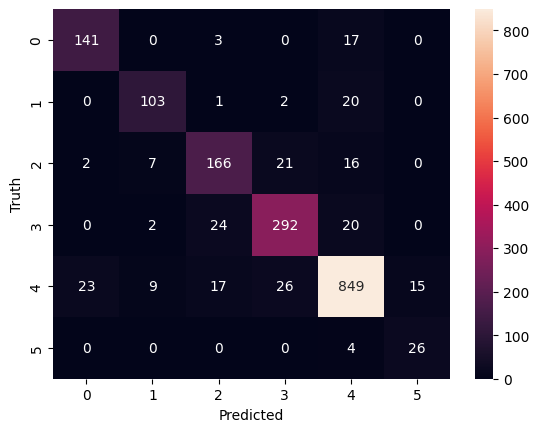

In [9]:
#evaluate the classifier with 3 metrics
#accuracy, classification report and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracyB = accuracy_score(Y_test, Y_pred)
print("Accuracy before opimization", accuracyB)

print("Classification Report before opimization")
print(classification_report(Y_test, Y_pred))

print("confusion_matrix before opimization")
#print(confusion_matrix(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sn.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
#after parameter optimization

param_grid_knn = {
    'n_neighbors': range(1, 50),  # Vary the number of neighbors
}

#GridSearchCV instance for knnclassifier with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=10, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train_scaled, Y_train)
best_params_knn = grid_search_knn.best_params_

print(best_params_knn)

# Get the best KNN classifier with the best hyperparameters
best_knn_classifier = grid_search_knn.best_estimator_

# Make predictions on the test data using the best KNN classifier
Y_pred = best_knn_classifier.predict(X_test_scaled)
Y_pred

Fitting 10 folds for each of 49 candidates, totalling 490 fits
{'n_neighbors': 1}


array([2, 4, 4, ..., 3, 4, 5], dtype=int64)

Accuracy after optimization  0.9031007751937985
Classification Report after optimization 
              precision    recall  f1-score   support

           1       0.91      0.91      0.91       161
           2       0.85      0.95      0.90       126
           3       0.83      0.86      0.84       212
           4       0.89      0.88      0.89       338
           5       0.94      0.92      0.93       939
           7       0.77      0.77      0.77        30

    accuracy                           0.90      1806
   macro avg       0.86      0.88      0.87      1806
weighted avg       0.90      0.90      0.90      1806

confusion_matrix after optimization 


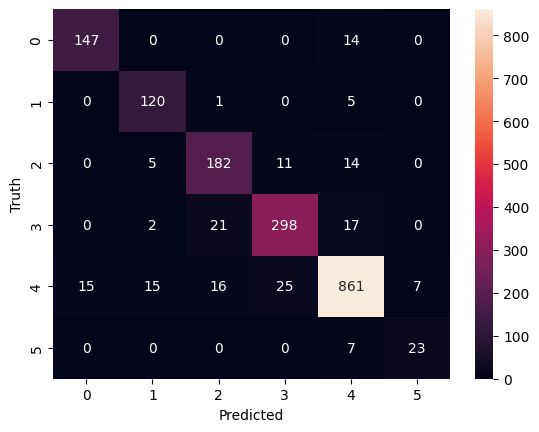

In [11]:
accuracyA = accuracy_score(Y_test, Y_pred)
print("Accuracy after optimization ", accuracyA)

print("Classification Report after optimization ")
print(classification_report(Y_test, Y_pred))

print("confusion_matrix after optimization ")
#print(confusion_matrix(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [12]:
print("Accuracy before parameter optimization: {:.2f}".format(accuracyB))
print("Accuracy for after parameter optimization: {:.2f}".format(accuracyA))

Accuracy before parameter optimization: 0.87
Accuracy for after parameter optimization: 0.90


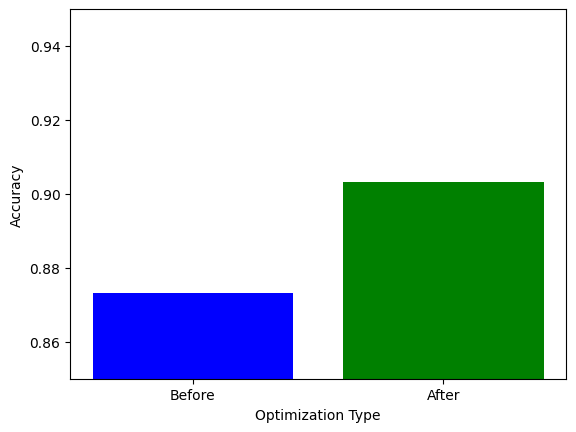

In [13]:
labels = ['Before', 'After']
accuracy_scores = [accuracyB, accuracyA]

#chart to see difference
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Optimization Type')
plt.ylabel('Accuracy')
plt.ylim(0.85, 0.95)
plt.show()


a) Use the Machine Learning algorithms: 
    k-NN to classify multiphase flow patterns, 
    using the database BD12Experiments6FP.csv and 
    evaluate the performance.
    
b) Apply parameters optimization to (a) and evaluate the performance.
    
c) Explain the Confusion Matrix obtained in (a) y (b), that is, before and after parameters optimization.
before parameter optimization, the accuracy of the KNN classification was only 87% and after parameter optimization, it had a 90%, which was an increase of 3%. 

Generally speaking, after the parameter optimization, accuracy, precision and f1 scores were all higher. It means the KNN classififer after optimization performed better, and since it had a higher f1 score, made more correct predictions across the entire dataset
